In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_blobs

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

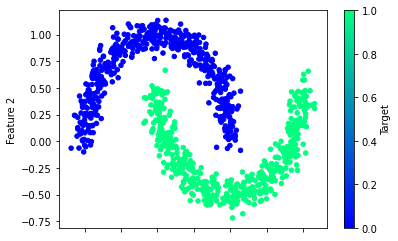

In [2]:
X_moons, y_moons = make_moons(n_samples=1000,noise=0.08, random_state=78)

#transforming y_moons to a vertical vetor
y_moons = y_moons.reshape(-1,1)

#create a df to plot the data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons['Target'] = y_moons

#plot the data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap = "winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons,y_moons, random_state=78)

#Create scaler instance
X_moons_caler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_moons_caler.fit(X_moon_train)

#scale the data
X_moon_train_scaled = X_moons_caler.transform(X_moon_train)
X_moon_test_scaled = X_moons_caler.transform(X_moon_test)

In [4]:
#Train the model with nonlinear data
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [5]:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train,epochs=100,shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 568us/step - loss: 0.7977 - accuracy: 0.2606
Epoch 2/100
24/24 [==============================] - 0s 522us/step - loss: 0.7824 - accuracy: 0.1332
Epoch 3/100
24/24 [==============================] - 0s 609us/step - loss: 0.7619 - accuracy: 0.1318
Epoch 4/100
24/24 [==============================] - 0s 652us/step - loss: 0.7636 - accuracy: 0.1333
Epoch 5/100
24/24 [==============================] - 0s 652us/step - loss: 0.7470 - accuracy: 0.1416
Epoch 6/100
24/24 [==============================] - 0s 696us/step - loss: 0.7337 - accuracy: 0.1629
Epoch 7/100
24/24 [==============================] - 0s 652us/step - loss: 0.7251 - accuracy: 0.1704
Epoch 8/100
24/24 [==============================] - 0s 696us/step - loss: 0.7196 - accuracy: 0.1483
Epoch 9/100
24/24 [==============================] - 0s 696us/step - loss: 0.7103 - accuracy: 0.4859
Epoch 10/100
24/24 [==============================] - 0s 696us/step - loss: 0.7038 - accura

24/24 [==============================] - 0s 609us/step - loss: 0.3298 - accuracy: 0.8793
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.3189 - accuracy: 0.8886
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.3143 - accuracy: 0.8793
Epoch 84/100
24/24 [==============================] - 0s 565us/step - loss: 0.3401 - accuracy: 0.8665
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.3220 - accuracy: 0.8860
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.3387 - accuracy: 0.8751
Epoch 87/100
24/24 [==============================] - 0s 609us/step - loss: 0.3005 - accuracy: 0.8974
Epoch 88/100
24/24 [==============================] - 0s 609us/step - loss: 0.3137 - accuracy: 0.8950
Epoch 89/100
24/24 [==============================] - 0s 609us/step - loss: 0.2970 - accuracy: 0.8959
Epoch 90/100
24/24 [==============================] - 0s 609us/step - loss: 0.3017 - accuracy: 

<AxesSubplot:>

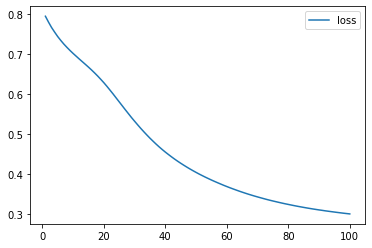

In [6]:
#create df with training data
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

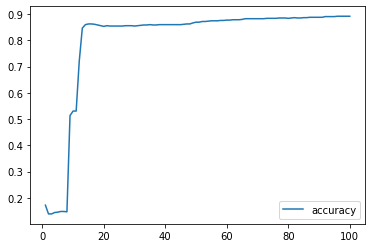

In [7]:
#plot the accuracy
history_df.plot(y="accuracy")

In [8]:
#generate new sequential model

new_model = tf.keras.models.Sequential()

In [9]:
#add input and hidden layer
number_inputs = 2
hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=hidden_nodes, activation='relu', input_dim=number_inputs))

#add output layer
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
#Compile the model and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

#fit the model
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle = True)

Epoch 1/100
24/24 [==============================] - 0s 609us/step - loss: 0.6594 - accuracy: 0.6925
Epoch 2/100
24/24 [==============================] - 0s 652us/step - loss: 0.6121 - accuracy: 0.8104
Epoch 3/100
24/24 [==============================] - 0s 696us/step - loss: 0.5671 - accuracy: 0.8357
Epoch 4/100
24/24 [==============================] - 0s 652us/step - loss: 0.5412 - accuracy: 0.8223
Epoch 5/100
24/24 [==============================] - 0s 1000us/step - loss: 0.5140 - accuracy: 0.8239
Epoch 6/100
24/24 [==============================] - 0s 913us/step - loss: 0.4840 - accuracy: 0.8487
Epoch 7/100
24/24 [==============================] - 0s 696us/step - loss: 0.4471 - accuracy: 0.8733
Epoch 8/100
24/24 [==============================] - 0s 565us/step - loss: 0.4348 - accuracy: 0.8499
Epoch 9/100
24/24 [==============================] - 0s 609us/step - loss: 0.4166 - accuracy: 0.8557
Epoch 10/100
24/24 [==============================] - 0s 652us/step - loss: 0.3868 - accur

Epoch 81/100
24/24 [==============================] - 0s 565us/step - loss: 0.1943 - accuracy: 0.9251
Epoch 82/100
24/24 [==============================] - 0s 565us/step - loss: 0.2073 - accuracy: 0.9147
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.2273 - accuracy: 0.9037
Epoch 84/100
24/24 [==============================] - 0s 565us/step - loss: 0.1906 - accuracy: 0.9271
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.2074 - accuracy: 0.9188
Epoch 86/100
24/24 [==============================] - 0s 652us/step - loss: 0.2053 - accuracy: 0.9164
Epoch 87/100
24/24 [==============================] - 0s 565us/step - loss: 0.2032 - accuracy: 0.9191
Epoch 88/100
24/24 [==============================] - 0s 609us/step - loss: 0.2070 - accuracy: 0.9204
Epoch 89/100
24/24 [==============================] - 0s 565us/step - loss: 0.2174 - accuracy: 0.9168
Epoch 90/100
24/24 [==============================] - 0s 652us/step - loss: 0.2353

<AxesSubplot:>

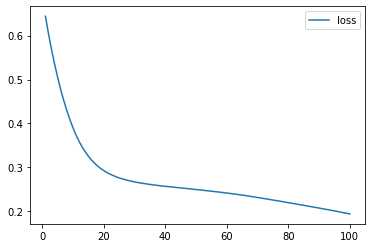

In [11]:
#create df with training data
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history['loss'])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

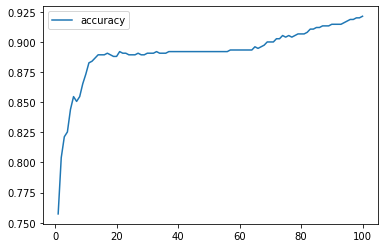

In [12]:
#plot the accuracy
history_df.plot(y="accuracy")